# TP2 - Lucas Garcia - Regresión

## Insurance


### 1 - Importar datos

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = pd.read_csv('insurance.csv')

### 2- Limpiamos el dataset

In [107]:
df = df.dropna()
df = df.drop_duplicates()
df_mv = df

df = df.select_dtypes(include=['int64', 'float64'])

### 3 - Describiendo el dataset


#### 3.1 - Descripcion general

In [108]:
print("Descripcion del dataset: \n")
print(df.describe())

Descripcion del dataset: 

               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


#### 3.2 - Histogramas

> Hacer un histograma nos permite visualizar la distribución de las variables en un gráfico bidimensional.

* Si la variable se distribuye normalmente, podemos usar el metodo de **Pearson** para la regresión lineal.
* Si la variable no se distribuye normalmente, podemos usar **Spearman** para la regresión lineal.

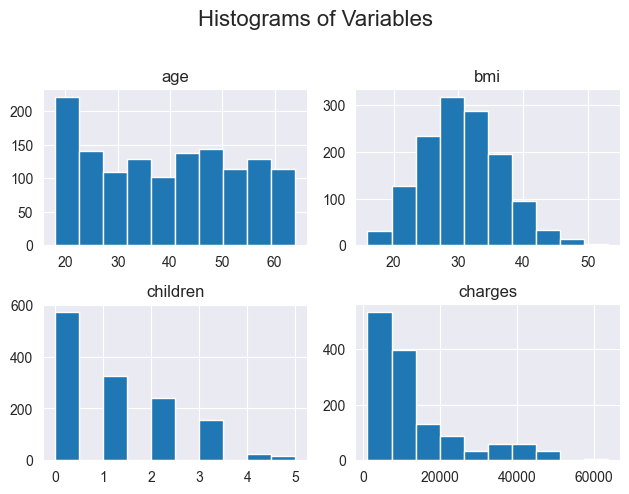

In [109]:
df.hist()
plt.suptitle("Histograms of Variables", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

> Vemos que solo la variable `bmi` se distribuye normalmente, por lo que usaremos `Spearman` para la regresión lineal.

#### 3.3 - Mapa de correlación

> El mapa de correlación nos permite visualizar la relación entre las variables y con eso elijo la dos para entrenar mi modelo de regresión.

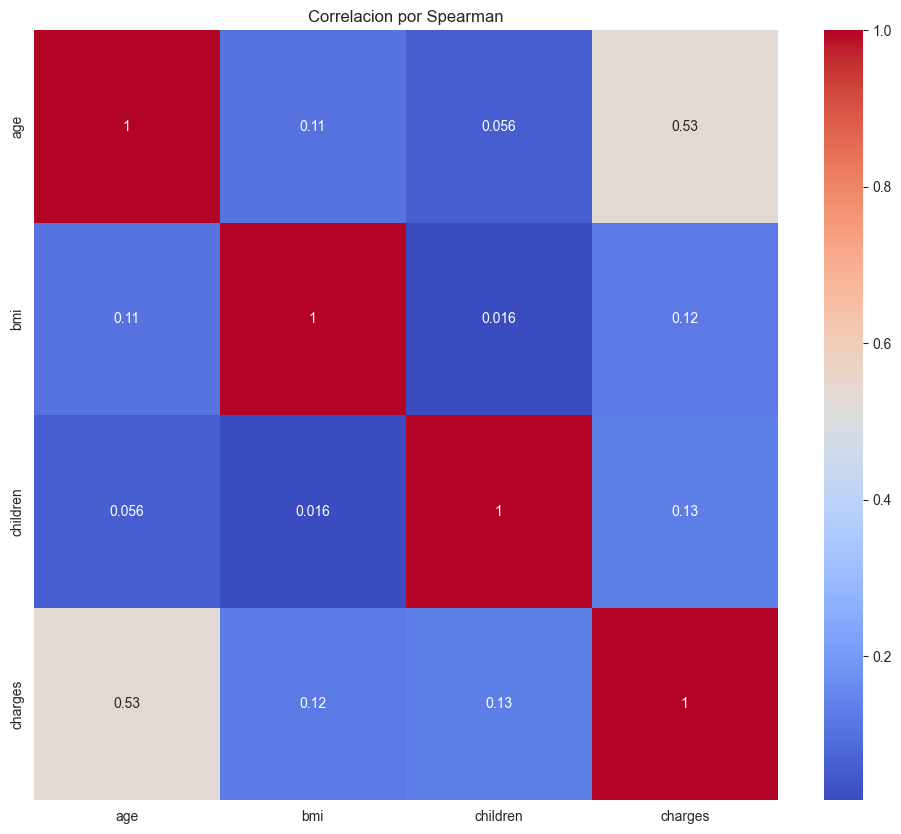

In [110]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr( method='spearman'), annot=True, cmap='coolwarm')
plt.title('Correlacion por Spearman')
plt.show()

> Vemos que la variable más correlacionada con `charges` es `age`

In [111]:
X_mv = df_mv.drop('charges', axis=1)
X = df[['age']]
y = df[['charges']]

### 4 - Dividimos y escalamos el dataset en train y test

#### 4.1 - Modelo multivariable

In [112]:
# Preprocessing for numerical and categorical features
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', LinearRegression())])



X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(X_mv, y, test_size=0.25, random_state=422)

#### 4.2 - Modelo univariable

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.flatten(), test_size=0.25, random_state=422)

### 5 - Entrenamos el modelo de regresión lineal

#### 5.1 - Modelo multivariable

In [114]:
# Creamos una instancia del modelo de regresión lineal
lr_model_mv = model_pipeline

# Entrenamos el modelo con los datos de entrenamiento escalados
lr_model_mv.fit(X_train_mv, y_train_mv)

# Realizamos predicciones con el modelo entrenado usando los datos de prueba escalados
y_pred_lr_mv = lr_model_mv.predict(X_test_mv)

# Calculamos el error cuadrático medio (MSE) comparando las predicciones con los valores reales
mse_lr_mv = mean_squared_error(y_test_mv, y_pred_lr_mv)

# Calculamos el coeficiente de determinación (R²) para evaluar la bondad del ajuste
r2_lr_mv = r2_score(y_test_mv, y_pred_lr_mv)

# Imprimimos los resultados
print("Resultados:")
print(f"Error Cuadrático Medio: {mse_lr_mv}")  # Muestra qué tan lejos están las predicciones de los valores reales
print(f"Coeficiente de Determinación (R²): {r2_lr_mv}")  # Indica qué proporción de la varianza en la variable dependiente es predecible

Resultados:
Error Cuadrático Medio: 35971850.17443347
Coeficiente de Determinación (R²): 0.7519337433080325


#### 5.2 - Modelo univariable

In [115]:
# Creamos una instancia del modelo de regresión lineal
lr_model = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento escalados
lr_model.fit(X_train, y_train)

# Realizamos predicciones con el modelo entrenado usando los datos de prueba escalados
y_pred_lr = lr_model.predict(X_test)

# Calculamos el error cuadrático medio (MSE) comparando las predicciones con los valores reales
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calculamos el coeficiente de determinación (R²) para evaluar la bondad del ajuste
r2_lr = r2_score(y_test, y_pred_lr)

# Imprimimos los resultados
print("Resultados:")
print(f"Error Cuadrático Medio: {mse_lr}")  # Muestra qué tan lejos están las predicciones de los valores reales
print(f"Coeficiente de Determinación (R²): {r2_lr}")  # Indica qué proporción de la varianza en la variable dependiente es predecible

Resultados:
Error Cuadrático Medio: 133203610.45880692
Coeficiente de Determinación (R²): 0.08141169097117051


### 6 - Support Vector Regression (SVR) y Decision Tree (DT)

In [116]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR Results:")
print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared Score: {r2_svr}")

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Results:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R-squared Score: {r2_dt}")

svr_scores = cross_val_score(svr_model, X, y.values.flatten(), cv=5, scoring='neg_mean_squared_error')
dt_scores = cross_val_score(dt_model, X, y.values.flatten(), cv=5, scoring='neg_mean_squared_error')

print("\nCross-validation Results:")
print(f"SVR MSE: {-svr_scores.mean():.2f} (+/- {svr_scores.std() * 2:.2f})")
print(f"Decision Tree MSE: {-dt_scores.mean():.2f} (+/- {dt_scores.std() * 2:.2f})")

SVR Results:
Mean Squared Error: 155731216.4857713
R-squared Score: -0.07394142187239128

Decision Tree Results:
Mean Squared Error: 135448870.64227802
R-squared Score: 0.06592810349061717

Cross-validation Results:
SVR MSE: 161708282.63 (+/- 20163953.67)
Decision Tree MSE: 139765451.66 (+/- 17442302.72)


In [117]:
print("### 7 - Conclusiones")

print("\n#### 1. **Regresión Lineal Multivariable**:")
print(f"   - **MSE:** {mse_lr_mv:.2f}")
print(f"   - **R²:** {r2_lr_mv:.2f}")
print(f"   - **Conclusión:** El modelo explica el {r2_lr_mv:.2%} de la variabilidad en los costos de seguros.")

print("\n#### 2. **Regresión Lineal Univariable (edad como predictor)**:")
print(f"   - **MSE:** {mse_lr:.2f}")
print(f"   - **R²:** {r2_lr:.2f}")
print(f"   - **Conclusión:** El modelo explica el {r2_lr:.2%} de la variabilidad.")

print("\n#### 3. **Support Vector Regression (SVR)**:")
print(f"   - **MSE:** {mse_svr:.2f}")
print(f"   - **R²:** {r2_svr:.2f}")
print(f"   - **Conclusión:** El modelo explica el {r2_svr:.2%} de la variabilidad.")
print(f"   - **Cross-validation MSE:** {-svr_scores.mean():.2f} (+/- {svr_scores.std() * 2:.2f})")

print("\n#### 4. **Árbol de Decisión**:")
print(f"   - **MSE:** {mse_dt:.2f}")
print(f"   - **R²:** {r2_dt:.2f}")
print(f"   - **Conclusión:** El modelo explica el {r2_dt:.2%} de la variabilidad.")
print(f"   - **Cross-validation MSE:** {-dt_scores.mean():.2f} (+/- {dt_scores.std() * 2:.2f})")

print("\n#### **Conclusión Final**:")
print("- **Mejor Modelo:** La regresión lineal multivariable es la más efectiva, con el menor MSE y el mayor R², por lo tanto, es la mejor opción para predecir `charges`.")

### 7 - Conclusiones

#### 1. **Regresión Lineal Multivariable**:
   - **MSE:** 35971850.17
   - **R²:** 0.75
   - **Conclusión:** El modelo explica el 75.19% de la variabilidad en los costos de seguros.

#### 2. **Regresión Lineal Univariable (edad como predictor)**:
   - **MSE:** 133203610.46
   - **R²:** 0.08
   - **Conclusión:** El modelo explica el 8.14% de la variabilidad.

#### 3. **Support Vector Regression (SVR)**:
   - **MSE:** 155731216.49
   - **R²:** -0.07
   - **Conclusión:** El modelo explica el -7.39% de la variabilidad.
   - **Cross-validation MSE:** 161708282.63 (+/- 20163953.67)

#### 4. **Árbol de Decisión**:
   - **MSE:** 135448870.64
   - **R²:** 0.07
   - **Conclusión:** El modelo explica el 6.59% de la variabilidad.
   - **Cross-validation MSE:** 139765451.66 (+/- 17442302.72)

#### **Conclusión Final**:
- **Mejor Modelo:** La regresión lineal multivariable es la más efectiva, con el menor MSE y el mayor R², por lo tanto, es la mejor opción para predecir `charge